## Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib
from collections import Counter
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('model.csv',index_col=None)
pd.set_option('display.max_columns',500)
df.head()

,author,2010pb,2011pb,2012pb,2010fund,2011fund,2012fund,2010im,2011im,2012im,2010pbf,2011pbf,2012pbf,2010fundf,2011fundf,2012fundf,2010imf,2011imf,2012imf,target,degree,indegree,outdegree,between,close,eigen
0,"Abatangelo, Giovanni",1.0,0.0,0.0,0.0,0.0,0.0,6.202,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.458,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
1,"Abbasi, Azhar Z.",0.0,1.0,0.0,0.0,1.0,0.0,0.000,4.596,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,8.387,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14
2,"Abdal-hay, Abdalla",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,3.772,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.772,12.442,0.000106,0.000000,0.000106,0.0,0.000000,2.245117e-15
3,"Abdollahi, Mohammad",0.0,0.0,2.0,0.0,0.0,1.0,0.000,0.000,2.597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.638,0.000071,0.000071,0.000000,0.0,0.000071,8.755958e-14
4,"Abe, Koji",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,5.054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.640,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14


## Add new features
- The difference of publication,funding and impact factor of each author year over year
- The sum of publication,funding and impact fact. 

In [3]:
# pb
df['interpb_1'] = df['2011pb']-df['2010pb']
df['interpb_2'] = df['2012pb']-df['2011pb']
df['interpb_3'] = df['2012pb']-df['2010pb']
df['pbsum'] = df['2010pb']+df['2011pb']+df['2012pb']
# fund
df['interf_1'] = df['2011fund']-df['2010fund']
df['interf_2'] = df['2012fund']-df['2011fund']
df['interf_3'] = df['2012fund']-df['2010fund']
df['fundsum'] = df['2010fund']+df['2011fund']+df['2012fund']
# im
df['interim_1'] = df['2011im']-df['2010im']
df['interim_2'] = df['2012im']-df['2011im']
df['interim_3'] = df['2012im']-df['2010im']
df['imsum'] = df['2010im']+df['2011im']+df['2012im']

#pbf,imf,fundf
df['interpbf_1'] = df['2012pbf']-df['2010pbf']
df['interfundf_1'] = df['2012fundf']-df['2010fundf']
df['interimf_2'] = df['2012imf']-df['2010imf']

df['pbfsum'] = df['2010pbf']+df['2011pbf']+df['2012pbf']
df['fundfsum'] = df['2010fundf']+df['2011fundf']+df['2012fundf']
df['imfsum'] = df['2010imf']+df['2011imf']+df['2012imf']

In [4]:
# log transform on target variable 
# df["target"] = np.log1p(df["target"])

In [5]:
df.head()

,author,2010pb,2011pb,2012pb,2010fund,2011fund,2012fund,2010im,2011im,2012im,2010pbf,2011pbf,2012pbf,2010fundf,2011fundf,2012fundf,2010imf,2011imf,2012imf,target,degree,indegree,outdegree,between,close,eigen,interpb_1,interpb_2,interpb_3,pbsum,interf_1,interf_2,interf_3,fundsum,interim_1,interim_2,interim_3,imsum,interpbf_1,interfundf_1,interimf_2,pbfsum,fundfsum,imfsum
0,"Abatangelo, Giovanni",1.0,0.0,0.0,0.0,0.0,0.0,6.202,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.458,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-6.202,0.000,-6.202,6.202,0.0,0.0,0.000,0.0,0.0,0.000
1,"Abbasi, Azhar Z.",0.0,1.0,0.0,0.0,1.0,0.0,0.000,4.596,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,8.387,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14,1.0,-1.0,0.0,1.0,1.0,-1.0,0.0,1.0,4.596,-4.596,0.000,4.596,0.0,0.0,0.000,0.0,0.0,0.000
2,"Abdal-hay, Abdalla",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,3.772,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.772,12.442,0.000106,0.000000,0.000106,0.0,0.000000,2.245117e-15,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.000,3.772,3.772,3.772,2.0,2.0,3.772,2.0,2.0,3.772
3,"Abdollahi, Mohammad",0.0,0.0,2.0,0.0,0.0,1.0,0.000,0.000,2.597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.638,0.000071,0.000071,0.000000,0.0,0.000071,8.755958e-14,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,0.000,2.597,2.597,2.597,0.0,0.0,0.000,0.0,0.0,0.000
4,"Abe, Koji",0.0,0.0,2.0,0.0,0.0,2.0,0.000,0.000,5.054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.640,0.000035,0.000035,0.000000,0.0,0.000035,4.490235e-14,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.000,5.054,5.054,5.054,0.0,0.0,0.000,0.0,0.0,0.000



 mu = 9.24 and sigma = 15.08



Text(0.5, 1.0, 'Impact Factor distribution')

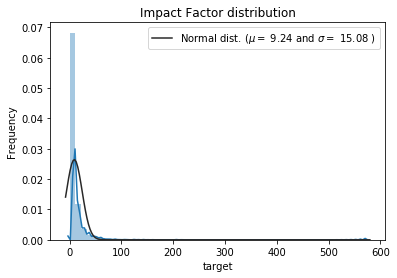

In [6]:
# target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

sns.distplot(df['target'],fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['target'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Impact Factor distribution')

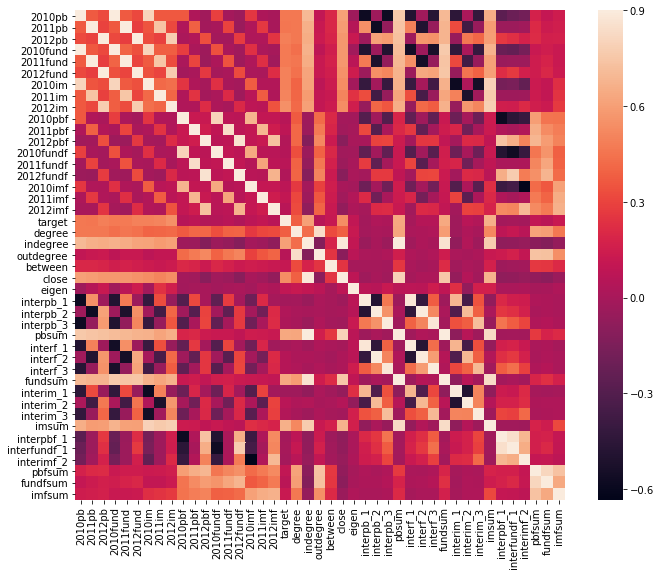

In [7]:
# feature correlation
corr = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)

### Built Ranking dataset for later result analysis

In [8]:
df_rank = df[['author','target','imfsum']]
df_rank['imfsum'] = np.log1p(df["imfsum"])
df_rank['rank_imf'] = df['imsum'].rank(method='first', ascending=False)
df_rank['rank_tar'] = df['target'].rank(method='first', ascending=False)

### Linear regression
- Linear regression model and linear regression with ridge, lasso, elasticNet regulirezation.

In [9]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

y = df['target']
x = df.drop(['author','target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 11.263442524729191
RMSE on Test set : 10.456657562574783


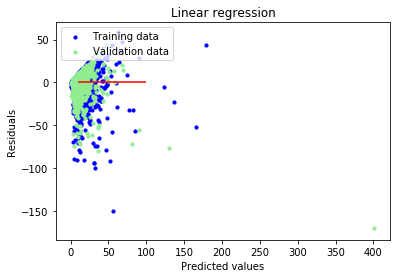

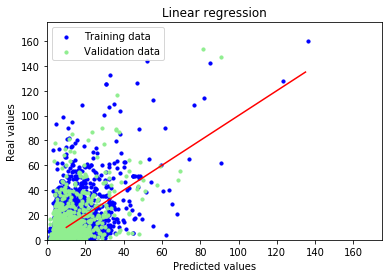

In [10]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, s=10, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, s=10, c = "lightgreen", marker = "o", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y=0, xmin=10, xmax=100, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, s=10,c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test,s=10, c = "lightgreen", marker = "o", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.xlim(0,175)
plt.ylim(0,175)
plt.legend(loc = "upper left")
plt.plot([10, 135], [10, 135], c = "red")
plt.show()

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 11.26843606192196
Ridge RMSE on Test set : 10.3060431692913


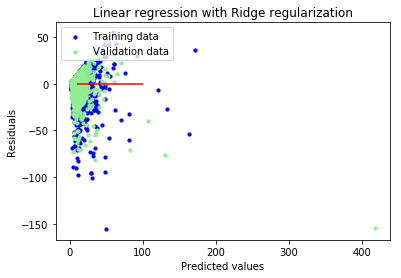

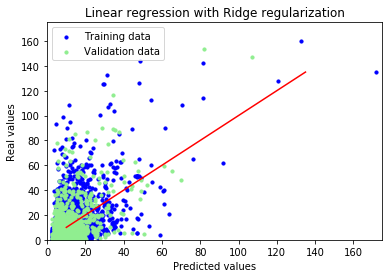

Ridge picked 42 features and eliminated the other 0 features


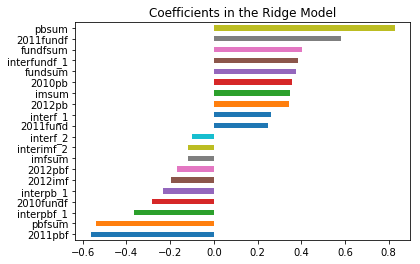

In [11]:
# ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", s=10, marker = "o", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", s=10, marker = "o", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y=0, xmin=10, xmax=100, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", s=10,marker = "o", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen",s=10, marker = "o", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.xlim(0,175)
plt.ylim(0,175)
plt.plot([10, 135], [10, 135], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Best alpha : 0.3
Try again for more precision with alphas centered around 0.3
Best alpha : 0.285
Lasso RMSE on Training set : 11.23312704450481
Lasso RMSE on Test set : 10.295604245986878


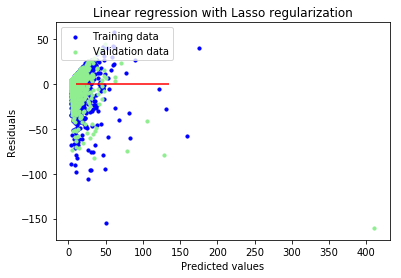

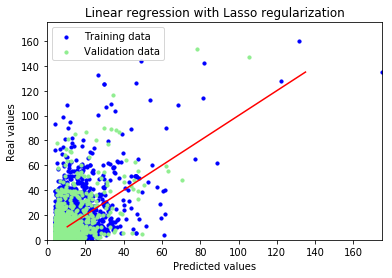

Lasso picked 7 features and eliminated the other 35 features


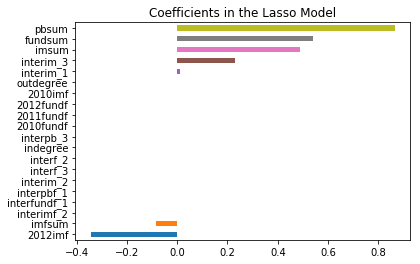

In [12]:
# lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue",s=10, marker = "o", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", s=10,marker = "o", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 135, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "o",s=10, label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "o",s=10, label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.xlim(0,175)
plt.ylim(0,175)
plt.plot([10.5, 135], [10.5, 135], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Best l1_ratio : 0.95
Best alpha : 0.3
Try again for more precision with l1_ratio centered around 0.95
Best l1_ratio : 0.95
Best alpha : 0.3
Now try again for more precision on alpha, with l1_ratio fixed at 0.95 and alpha centered around 0.3
Best l1_ratio : 0.95
Best alpha : 0.3
ElasticNet RMSE on Training set : 11.229271934416003
ElasticNet RMSE on Test set : 10.293781651255946


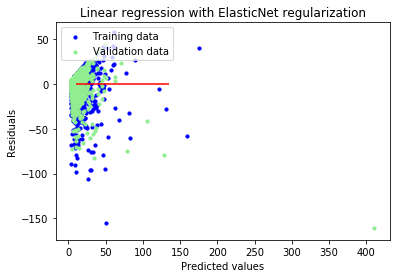

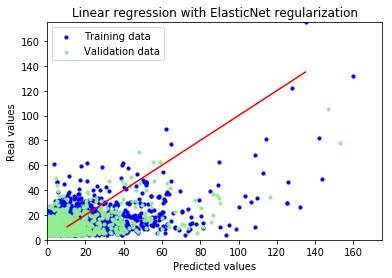

ElasticNet picked 7 features and eliminated the other 35 features


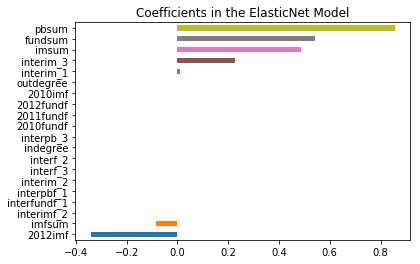

In [13]:
# elasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", s=10, marker = "o", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", s=10, marker = "o", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 135, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", s=10, marker = "o", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen",s=10, marker = "o", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.xlim(0,175)
plt.ylim(0,175)
plt.plot([10.5, 135], [10.5, 135], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### Random Forest

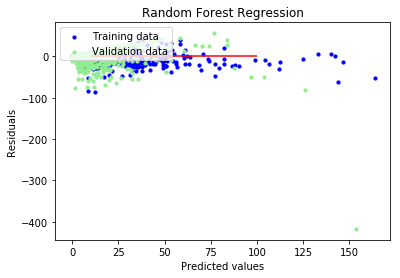

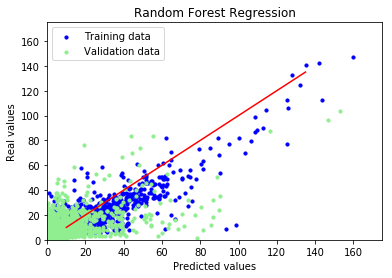

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rf = RandomForestRegressor(n_estimators=20, random_state=0)  
rf.fit(X_train, y_train)  
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# Plot residuals
plt.scatter(y_train_rf, y_train_rf - y_train, s=10, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_rf, y_test_rf - y_test, s=10, c = "lightgreen", marker = "o", label = "Validation data")
plt.title("Random Forest Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10, xmax = 100, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_rf,s=10, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test, y_test_rf,s=10, c = "lightgreen", marker = "o", label = "Validation data")
plt.title("Random Forest Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.xlim(0,175)
plt.ylim(0,175)
plt.plot([10, 135], [10, 135], c = "red")
plt.show()

## Result Analysis

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=True)

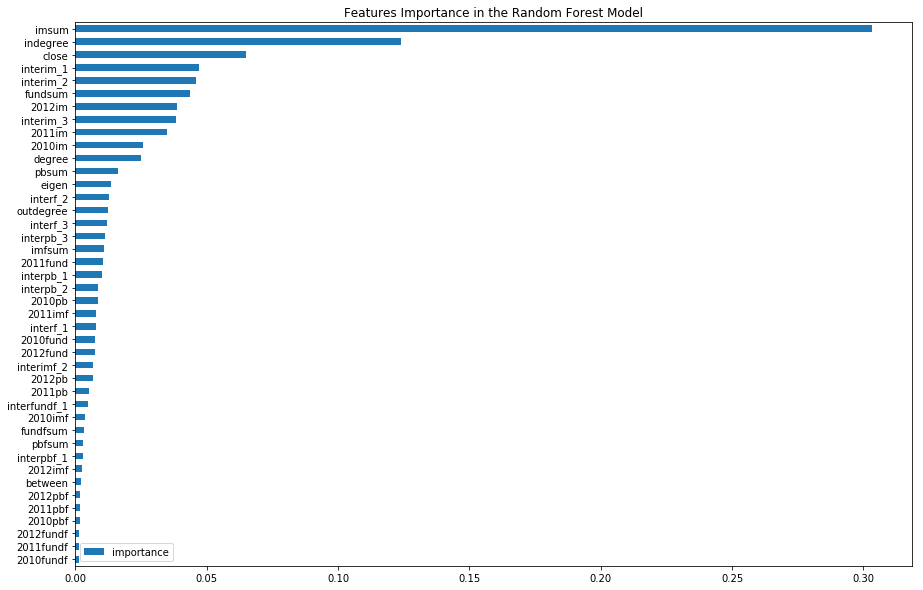

In [16]:
plt.rcParams["figure.figsize"] = (15,10)
feature_importances.plot(kind = "barh")
plt.title("Features Importance in the Random Forest Model")
plt.show()

In [17]:
errordf= pd.DataFrame(columns=['train','test'])
errordf = errordf.append(pd.DataFrame([[rmse_cv_train(lr).mean(),rmse_cv_test(lr).mean()]],index=['lr'],columns=errordf.columns))
errordf = errordf.append(pd.DataFrame([[rmse_cv_train(ridge).mean(),rmse_cv_test(ridge).mean()]],index=['ridge'],columns=errordf.columns))
errordf = errordf.append(pd.DataFrame([[rmse_cv_train(lasso).mean(),rmse_cv_test(lasso).mean()]],index=['lasso'],columns=errordf.columns))
errordf = errordf.append(pd.DataFrame([[rmse_cv_train(elasticNet).mean(),rmse_cv_test(elasticNet).mean()]],index=['elasticNet'],columns=errordf.columns))
errordf = errordf.append(pd.DataFrame([[rmse_cv_train(rf).mean(),rmse_cv_test(rf).mean()]],index=['rf'],columns=errordf.columns))

In [18]:
errordf

,train,test
lr,11.263443,10.456658
ridge,11.268436,10.306043
lasso,11.233127,10.295604
elasticNet,11.229272,10.293782
rf,12.161140,12.957525


Text(0.5, 1.0, 'RMSE')

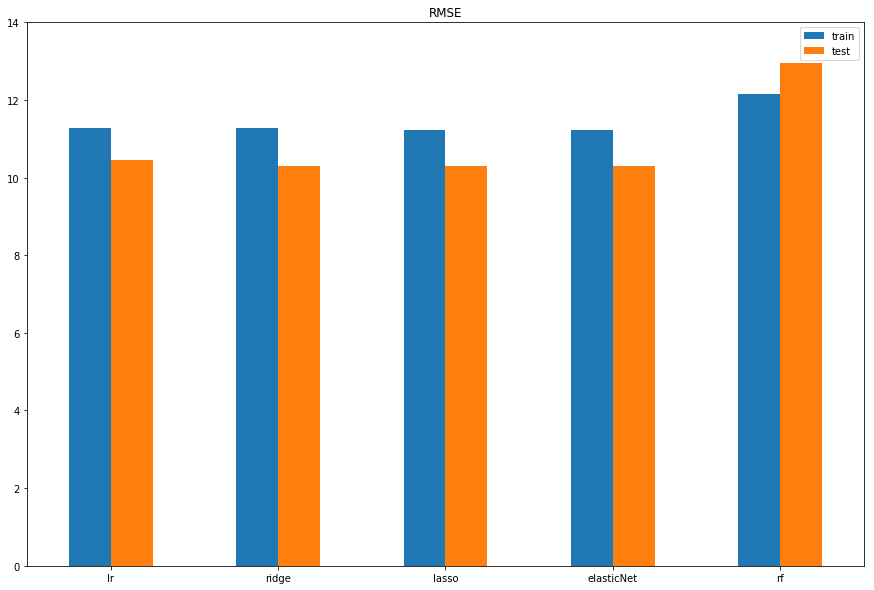

In [19]:
errordf.plot.bar(rot=0);
plt.ylim(0,14)
plt.title("RMSE")

In [20]:
y_pred_rf = rf.predict(x)
y_pred_lr = lr.predict(x)
y_pred_ridge = ridge.predict(x)
y_pred_lasso = lasso.predict(x)
y_pred_elasticNet = elasticNet.predict(x)

prediction = pd.DataFrame({'pred_rf':y_pred_rf,
                           'pred_lr':y_pred_lr,
                           'pred_ridge':y_pred_ridge,
                           'pred_lasso':y_pred_lasso,
                           'pred_elasticNet': y_pred_elasticNet})

result = pd.concat([df_rank, prediction], axis=1).sort_values(by='target',ascending=False)
result['rank_rf'] = result['pred_rf'].rank(method='first', ascending=False)
result['rank_lr'] = result['pred_lr'].rank(method='first', ascending=False)
result['rank_ridge'] = result['pred_ridge'].rank(method='first', ascending=False)
result['rank_lasso'] = result['pred_lasso'].rank(method='first', ascending=False)
result['rank_elasticNet'] = result['pred_elasticNet'].rank(method='first', ascending=False)

In [21]:
result_20 = result[['author','rank_imf','rank_tar','rank_rf','rank_lr','rank_ridge','rank_lasso',\
        'rank_elasticNet']].head(n=20)

In [22]:
#result_20.to_csv('result_20.csv',index=False)
result_20

,author,rank_imf,rank_tar,rank_rf,rank_lr,rank_ridge,rank_lasso,rank_elasticNet
2630,"Kaplan, David L.",1.0,1.0,2.0,1.0,1.0,1.0,1.0
3691,"Mano, Joao F.",4.0,2.0,1.0,3.0,3.0,3.0,3.0
4752,"Reis, Rui L.",6.0,3.0,8.0,5.0,5.0,5.0,5.0
3980,"Mooney, David J.",41.0,4.0,4.0,25.0,31.0,29.0,29.0
2692,"Khademhosseini, Ali",5.0,5.0,3.0,4.0,4.0,4.0,4.0
977,"Chu, Paul K.",14.0,6.0,14.0,11.0,9.0,11.0,11.0
3160,"Lendlein, Andreas",15.0,7.0,16.0,7.0,7.0,7.0,7.0
611,"Burdick, Jason A.",42.0,8.0,11.0,30.0,36.0,33.0,33.0
4283,"Omenetto, Fiorenzo G.",7.0,9.0,5.0,9.0,11.0,9.0,9.0
3026,"Langer, Robert",2.0,10.0,6.0,2.0,2.0,2.0,2.0


In [23]:
n=100
result_1 = result[0:n]
dic_seat = {}
dic_seat['rf'] = len(result_1[result_1.rank_rf<=n])
dic_seat['lr'] = len(result_1[result_1.rank_lr<=n])
dic_seat['ridge'] = len(result_1[result_1.rank_ridge<=n])
dic_seat['lasso'] = len(result_1[result_1.rank_lasso<=n])
dic_seat['elasticNet'] = len(result_1[result_1.rank_elasticNet<=n])

In [24]:
print(dic_seat.items())

dict_items([('rf', 57), ('lr', 36), ('ridge', 33), ('lasso', 35), ('elasticNet', 35)])


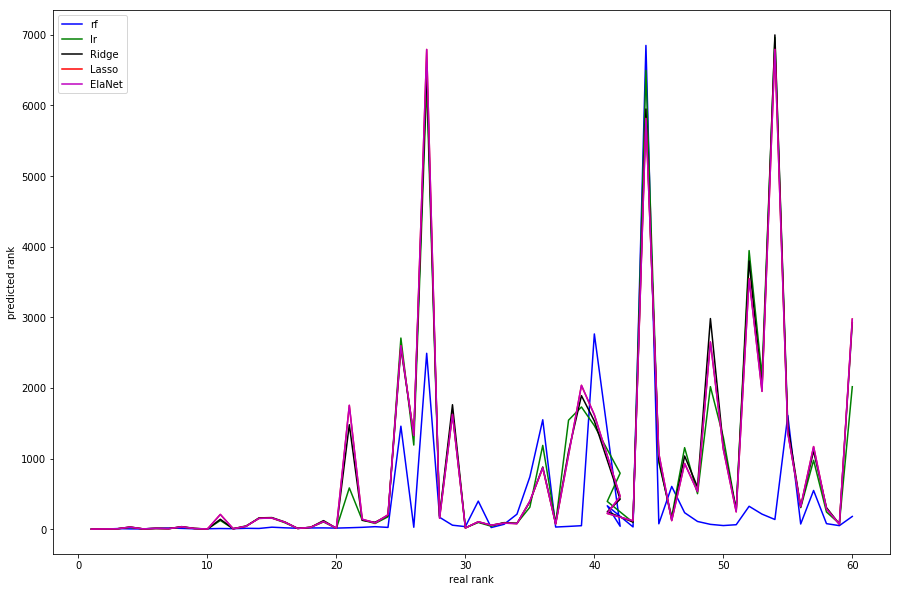

In [25]:
import matplotlib.pyplot as plt

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

result_1 = result[0:60]
ax.plot(result_1['rank_tar'],result_1['rank_rf'],c='b',ls='-',label='rf')
ax.plot(result_1['rank_tar'],result_1['rank_lr'],c='g',ls='-',label='lr')
ax.plot(result_1['rank_tar'],result_1['rank_ridge'],c='k',ls='-',label='Ridge')
ax.plot(result_1['rank_tar'],result_1['rank_lasso'],c='r',ls='-',label='Lasso')
ax.plot(result_1['rank_tar'],result_1['rank_elasticNet'],c='m',ls='-',label='ElaNet')

plt.legend(loc=2)
plt.xlabel('real rank')
plt.ylabel('predicted rank')
plt.draw()